# Perceptual Framing Analysis Script (Perceptual Experiment) - Figures 1E, 1F, and 2C



# Load data and excluding participants

8 participants have been removed according to the exclusion criteria indicated in the paper.
Total number subjects = 40
Number of subjects remaining = =32

In [21]:
# Load data all participants
data_exp1 = pd.read_csv('/Users/pradyumna/Documents/GiTs/Sepulveda_et_al_2020/data/perceptual/DataPerceptualFramingNotebook_v1.csv') 

print (data_exp1["Part"].unique())
print ('Number of participants: ' + str(len(data_exp1["Part"].unique())))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 32 33]
Number of participants: 32


In [22]:
data_exp1=data_exp1.rename(index=str, columns={"ChosenITM":"Choice", 
                              "ChoiceRT":"RT",
                             "RValue":"RVal",
                             "LValue":"LVal",
                             "zRValue":"zRVal",
                             "zLValue":"zLVal",                    
                             "tDDT":"DDT",
                             "absDDT":"zAbsDDT",
                             "lIA_DT":"LDwellTime",
                             "rIA_DT":"RDwellTime",
                             "tGSF":"GSF",
                             "lastFixat":"LastFixat",
                             "DV":"DVal",
                             "zDV":"zDVal",
                             "absDV":"AbsDVal",
                             "zAbsDV":"zAbsDVal",                    
                             "zChoiceRT":"zRT",
                             "FamCh":"ChosenFam",
                              "FamUnCh":"UnchosenFam",
                              "ValCh":"ChosenVal",
                              "ValUnCh":"UnchosenVal",
                             "zFamCh":"zChosenFam",
                              "zFamUnCh":"zUnchosenFam",
                              "zValCh":"zChosenVal",
                              "zValUnCh":"zUnchosenVal",                   
                              "GSFMedSplit":"GSFSplit",
                            "DDTMedSplit":"DDTSplit"})


## Add missing zScored values

In [23]:
data_exp1["zGSF"] = z_score1(data_exp1,'Part',"GSF")
data_exp1["zDDT"] = z_score1(data_exp1,'Part',"DDT")
data_exp1["AbsDDT"] = abs(data_exp1["DDT"])
data_exp1["zAbsDDT"] = z_score1(data_exp1,'Part',"AbsDDT")

data_exp1["TotVal"] = data_exp1['LVal']+ data_exp1['RVal']
data_exp1["zTotVal"] = z_score1(data_exp1,'Part',"TotVal")

data_exp1["ChosenVal"] = data_exp1['RVal']*data_exp1['Choice']+ data_exp1['LVal']*(1-data_exp1['Choice'])
data_exp1["UnchosenVal"] = data_exp1['LVal']*data_exp1['Choice']+ data_exp1['RVal']*(1-data_exp1['Choice'])
data_exp1["zChosenVal"] = z_score1(data_exp1,'Part',"ChosenVal")
data_exp1["zUnchosenVal"] = z_score1(data_exp1,'Part',"UnchosenVal")


## Change the name of the BlockCond

In [24]:
# Change so everything is equal
data_exp1 = data_exp1.replace('NEXTLESS', 'MORE')
data_exp1 = data_exp1.replace('NEXTMORE', 'LESS')
data_exp1['BlockCond'].unique()

# Change so everything is equal
data_exp1 = data_exp1.replace('MORE', 1)
data_exp1 = data_exp1.replace('LESS', 2)
data_exp1['BlockCond'].unique()

array([2, 1])

## Add correct variable

In [25]:
Correct = []
for i in range(len(data_exp1)):
    if data_exp1.BlockCond[i] == 1:
        if (data_exp1.Choice[i] == 1 and (data_exp1.LVal[i] < data_exp1.RVal[i])) or (data_exp1.Choice[i] == 0 and (data_exp1.LVal[i] > data_exp1.RVal[i])):
            Correct.append(1)
        else:
            Correct.append(0)
    if data_exp1.BlockCond[i] == 2:
        if (data_exp1.Choice[i] == 1 and (data_exp1.LVal[i] > data_exp1.RVal[i])) or (data_exp1.Choice[i] == 0 and (data_exp1.LVal[i] < data_exp1.RVal[i])):
            Correct.append(1)
        else:
            Correct.append(0)

data_exp1["Correct"] = Correct

## Add Splits variable

In [26]:
data_splits = splitBy(data_exp1, Splits_headers = ['ConfSplit', 'GSFMedSplit','DDTMedSplit'],Splits_variables = ['Conf', 'GSF','DDT'])

In [27]:
data_exp1['ConfSplit'] = data_splits['ConfSplit'].values
data_exp1['GSFSplit'] = data_splits['GSFMedSplit'].values
data_exp1['DDTSplit'] = data_splits['DDTMedSplit'].values

## Add % time looked at each item

In [28]:
data_exp1['LGazePC'] = (data_exp1['LDwellTime']) / (data_exp1['RDwellTime'] + data_exp1['LDwellTime'])
data_exp1['RGazePC'] = (data_exp1['RDwellTime']) / (data_exp1['RDwellTime'] + data_exp1['LDwellTime'])

data_exp1['HValGazePC'] = ( data_exp1['LVal'] >= data_exp1['RVal'] ) * data_exp1['LGazePC'] + ( data_exp1['LVal'] <= data_exp1['RVal'] ) * data_exp1['RGazePC']
data_exp1['LValGazePC'] = ( data_exp1['LVal'] <= data_exp1['RVal'] ) * data_exp1['LGazePC'] + ( data_exp1['LVal'] >= data_exp1['RVal'] ) * data_exp1['RGazePC']

data_exp1['zLGazePC'] = z_score1(data_exp1,'Part','LGazePC')
data_exp1['zRGazePC'] = z_score1(data_exp1,'Part','RGazePC')

data_exp1['zHValGazePC'] = z_score1(data_exp1,'Part','HValGazePC')
data_exp1['zLValGazePC'] = z_score1(data_exp1,'Part','LValGazePC')  

## add % time looked at chosen items

In [29]:
data_exp1['ChosenGazePC'] = ( data_exp1['Choice'] == 0) * data_exp1['LGazePC'] + ( data_exp1['Choice'] == 1) * data_exp1['LGazePC']
data_exp1['UnchosenGazePC'] = ( data_exp1['Choice'] == 1) * data_exp1['LGazePC'] + ( data_exp1['Choice'] == 0)  * data_exp1['RGazePC']

data_exp1['zChosenGazePC'] = z_score1(data_exp1,'Part','ChosenGazePC')
data_exp1['zUnchosenGazePC'] = z_score1(data_exp1,'Part','UnchosenGazePC')  

# Data Analysis 
-------------------------------------------

### List of parameters available for analysis

In [30]:
figsize(15, 15)
#Transform to numeric values in the dataframe
data_exp1 = data_exp1.apply(pd.to_numeric, errors='ignore')
#Show the list of data columns
list(data_exp1)

['Unnamed: 0',
 'Part',
 'TrialN',
 'PairID',
 'LVal',
 'RVal',
 'Choice',
 'RT',
 'Conf',
 'ConfRT',
 'BlockCond',
 'DDT',
 'LDwellTime',
 'RDwellTime',
 'GSF',
 'LastFixat',
 'DVal',
 'zDVal',
 'AbsDVal',
 'zAbsDVal',
 'zConf',
 'zRT',
 'TotVal',
 'ChosenVal',
 'UnchosenVal',
 'Correct',
 'zTotVal',
 'zChosenVal',
 'zUnchosenVal',
 'zGSF',
 'zDDT',
 'zAbsDDT',
 'zValR',
 'zValL',
 'ConfSplit',
 'GSFSplit',
 'DDTSplit',
 'AbsDDT',
 'LGazePC',
 'RGazePC',
 'HValGazePC',
 'LValGazePC',
 'zLGazePC',
 'zRGazePC',
 'zHValGazePC',
 'zLValGazePC',
 'ChosenGazePC',
 'UnchosenGazePC',
 'zChosenGazePC',
 'zUnchosenGazePC']

## Select Frame

In [31]:
data_expL = data_exp1.loc[data_exp1['BlockCond'] == 1] # 1 = MORE, 2 = LESS
data_expD = data_exp1.loc[data_exp1['BlockCond'] == 2] 


# Logistic Choice Plots

# Overall choice logistic plots

Low measure:logit coef = [[1.14222004]] ; Intercept:  [0.24243036]
high measure:logit coef = [[2.16447107]] ; Intercept:  [0.73765473]
Low measure:logit coef = [[-1.11853054]] ; Intercept:  [-0.50841699]
high measure:logit coef = [[-2.01086711]] ; Intercept:  [-0.79596039]


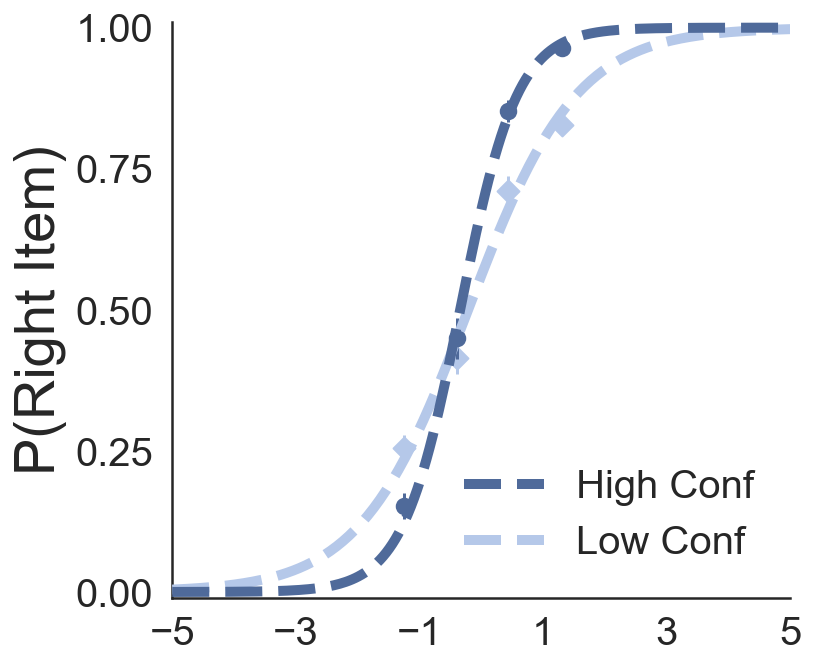

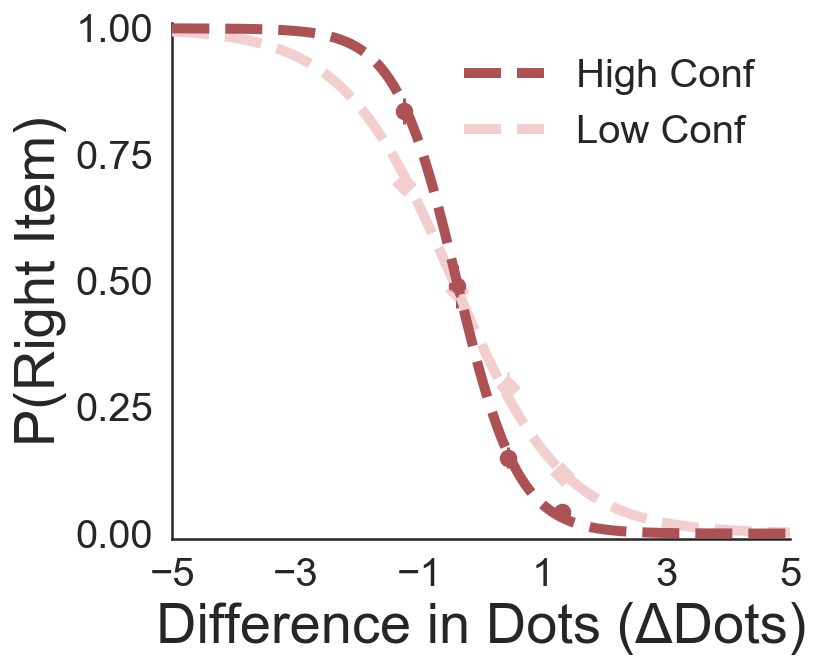

In [32]:
# Split by high/low conf
logisticplot_all('ConfSplit', 'High Conf', 'Low Conf', data=data_expL, xaxis='zDVal', yaxis='Choice', ylab='P(Right Item)', xlab='',
                 modhighcol='#4F6A9A', modlowcol='#B5C8E9', title='empty', parvar='Part')
plt.tight_layout()
#plt.savefig('SavedFigures/PF2019_LogisticChoiceMore_32.png', format='png', dpi = 500 )

# Split by high/low conf
logisticplot_all('ConfSplit', 'High Conf', 'Low Conf', data=data_expD, xaxis='zDVal', yaxis='Choice', ylab='P(Right Item)', xlab='Difference in Dots (ΔDots)',
                 modhighcol='#AC5255', modlowcol='#F2CECF', title='empty', parvar='Part')
plt.tight_layout()
#plt.savefig('SavedFigures/PF2019_LogisticChoiceLess_32.png', format='png', dpi = 500 )

# Check logistic regression values for individual participants (Confidence Split)

## Most Frame

In [33]:
coeficientes_like = logisticplot_all_sbj_slope('ConfSplit', 'High Conf', 'Low Conf', data=data_expL, xaxis='zDVal', yaxis='Choice', ylab='P(Right Item)', xlab='Difference in  Dots (ΔDots)',
                 modhighcol='#4F6A9A', modlowcol='#B5C8E9', title='empty', parvar='Part')
plt.tight_layout()

## Fewest Frame

In [34]:
coeficientes_dislike = logisticplot_all_sbj_slope('ConfSplit', 'High Confidence', 'Low Confidence', data=data_expD, xaxis='zDVal', yaxis='Choice', ylab='P(Right Item)', xlab='Difference in  Dots (ΔDots)',
                 modhighcol='#AC5255', modlowcol='#F2CECF', title='empty', parvar='Part')
plt.tight_layout()

## plot slopes of logistic fits

In [35]:
like_slopes = coeficientes_like['All Coef'].values
dislike_slopes = coeficientes_dislike['All Coef'].values

ChoiceSlopes: MeanL = 1.7703374945028325; MeanD = -1.6989423541520008; [Like - Dislike] =  3.4692798486548333; t =  22.22 ; p-value =1.3304097656674791e-20


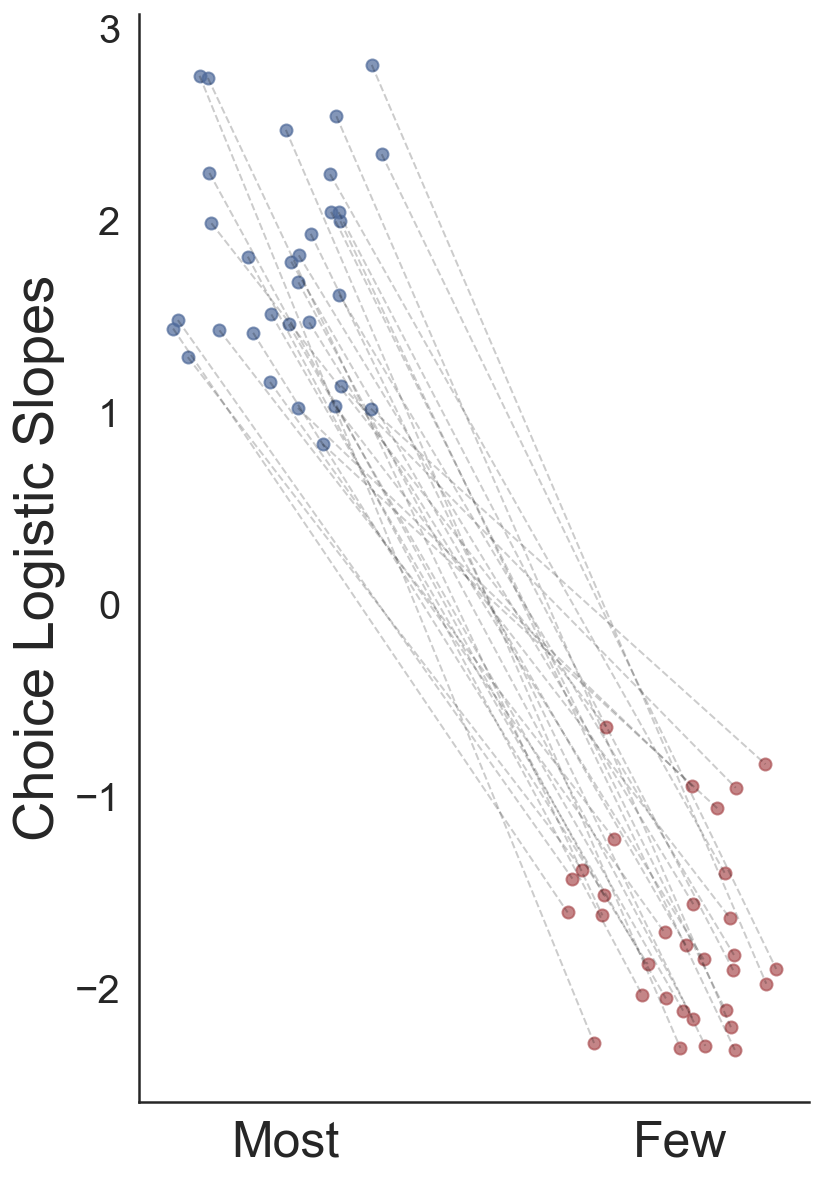

In [36]:
ttestsPlot(like_slopes, dislike_slopes,'#4F6A9A','#AC5255',"Most",  "Few",title = 'Choice Logistic Slopes')
#plt.savefig('SavedFigures/SlopesChoiceMoreLessComparison.svg', format='svg', dpi = 500 )


## Behavioural differences between Most and Fewest frames

In [37]:
partic = []
Correct_like = []
Correct_dislike = []
RT_like = []
RT_dislike = []
Conf_like = []
Conf_dislike = []

DDT_like = []
DDT_dislike = []
GSF_like = []
GSF_dislike = []
DFam_like = []
DFam_dislike = []
DVal_like = []
DVal_dislike = []

for i in unique(data_expL["Part"]):
    
    #if i== 2 or i ==26 or i==35:
    #    continue
        
    Correct_lik = data_expL.loc[(data_expL['Part'] == i),'Correct'].sum()/120
    Correct_dislik = data_expD.loc[(data_expD['Part'] == i),'Correct'].sum()/120
    
    RT_lik = data_expL.loc[(data_expL['Part'] == i),'RT'].sum()/120
    RT_dislik = data_expD.loc[(data_expD['Part'] == i),'RT'].sum()/120
    
    Conf_lik = data_expL.loc[(data_expL['Part'] == i),'zConf'].sum()/120
    Conf_dislik = data_expD.loc[(data_expD['Part'] == i),'zConf'].sum()/120

    DDT_lik = data_expL.loc[(data_expL['Part'] == i),'zAbsDDT'].sum()/120
    DDT_dislik = data_expD.loc[(data_expD['Part'] == i),'zAbsDDT'].sum()/120

    GSF_lik = data_expL.loc[(data_expL['Part'] == i),'zGSF'].sum()/120
    GSF_dislik = data_expD.loc[(data_expD['Part'] == i),'zGSF'].sum()/120
    
    Val_lik = data_expL.loc[(data_expL['Part'] == i),'LVal'].sum()
    Val_dislik = data_expD.loc[(data_expD['Part'] == i),'LVal'].sum()
    
    Correct_like.append(Correct_lik)
    Correct_dislike.append(Correct_dislik)
    RT_like.append(RT_lik)
    RT_dislike.append(RT_dislik)
    Conf_like.append(Conf_lik)
    Conf_dislike.append(Conf_dislik)
    DDT_like.append(DDT_lik)
    DDT_dislike.append(DDT_dislik)
    GSF_like.append(GSF_lik)
    GSF_dislike.append(GSF_dislik)

    DVal_like.append(Val_lik)
    DVal_dislike.append(Val_dislik)
    partic.append(i)

In [47]:
# USING REPEATED MEASURES t-test
diff = mean(Correct_like) - mean(Correct_dislike)
[s, p] = stats.ttest_rel(Correct_like,Correct_dislike)
print ("Correct: MeanL = "+ str(round(mean(Correct_like),2))+ "; MeanD = "+ str(round(mean(Correct_dislike),2))+"; [Most - Fewest] =  " + str(round(diff,2)) +"; t =  " + str(round(s,2)) + " ; p-value =" + str(round(p,5)))
p_correct = p

diff = mean(RT_like) - mean(RT_dislike)
[s, p] = stats.ttest_rel(RT_like,RT_dislike)
print ("RT: MeanL = "+ str(round(mean(RT_like),2))+ "; MeanD = "+ str(round(mean(RT_dislike),2))+"; [Most - Fewest] =  " + str(round(diff,2)) +"; t =  " + str(round(s,2)) + " ; p-value =" + str(round(p,5) ))
p_rt = p

diff = mean(Conf_like) - mean(Conf_dislike)
[s, p] = stats.ttest_rel(Conf_like,Conf_dislike)
print ("Conf: MeanL = "+ str(round(mean(Conf_like),2))+ "; MeanD = "+ str(round(mean(Conf_dislike),2))+"; [Most - Fewest] =  " + str(round(diff,2)) +"; t =  " + str(round(s,2)) + " ; p-value =" + str(round(p,5) ))
p_conf = p

diff = mean(DDT_like) - mean(DDT_dislike)
[s, p] = stats.ttest_rel(DDT_like,DDT_dislike)
print ("DDT: MeanL = "+ str(round(mean(DDT_like),2))+ "; MeanD = "+ str(round(mean(DDT_dislike),2))+"; [Most - Fewest] =  " + str(round(diff,2)) + "; t =  " + str(round(s,2))+ " ; p-value =" + str(round(p,5) ))
p_DDT = p

diff = mean(GSF_like) - mean(GSF_dislike)
[s, p] = stats.ttest_rel(GSF_like,GSF_dislike)
print ("GSF: MeanL = "+ str(round(mean(GSF_like),2))+ "; MeanD = "+ str(round(mean(GSF_dislike),2))+"; [Most - Fewest] =  " + str(round(diff,2)) +"; t =  " + str(round(s,2)) + " ; p-value =" + str(round(p ,5)))
p_GSF = p

diff = mean(DVal_like) - mean(DVal_dislike)
s, p = stats.ttest_rel(DVal_like,DVal_dislike)
print ("DVAl: MeanL = "+ str(round(mean(DVal_like),2))+ "; MeanD = "+ str(round(mean(DVal_dislike),2))+"; [Most - Fewest] =  " + str(round(diff,2)) +"; t =  " + str(round(s,2)) + " ; p-value =" + str(round(p,5) ))
p_DVal = p



Correct: MeanL = 0.77; MeanD = 0.74; [Most - Fewest] =  0.03; t =  2.46 ; p-value =0.01988
RT: MeanL = 4029.57; MeanD = 3975.59; [Most - Fewest] =  53.98; t =  0.32 ; p-value =0.75255
Conf: MeanL = 0.12; MeanD = -0.12; [Most - Fewest] =  0.24; t =  5.62 ; p-value =0.0
DDT: MeanL = 0.01; MeanD = -0.01; [Most - Fewest] =  0.02; t =  0.5 ; p-value =0.61727
GSF: MeanL = -0.09; MeanD = 0.09; [Most - Fewest] =  -0.17; t =  -4.15 ; p-value =0.00024
DVAl: MeanL = 9600.0; MeanD = 9600.0; [Most - Fewest] =  0.0; t =  nan ; p-value =nan


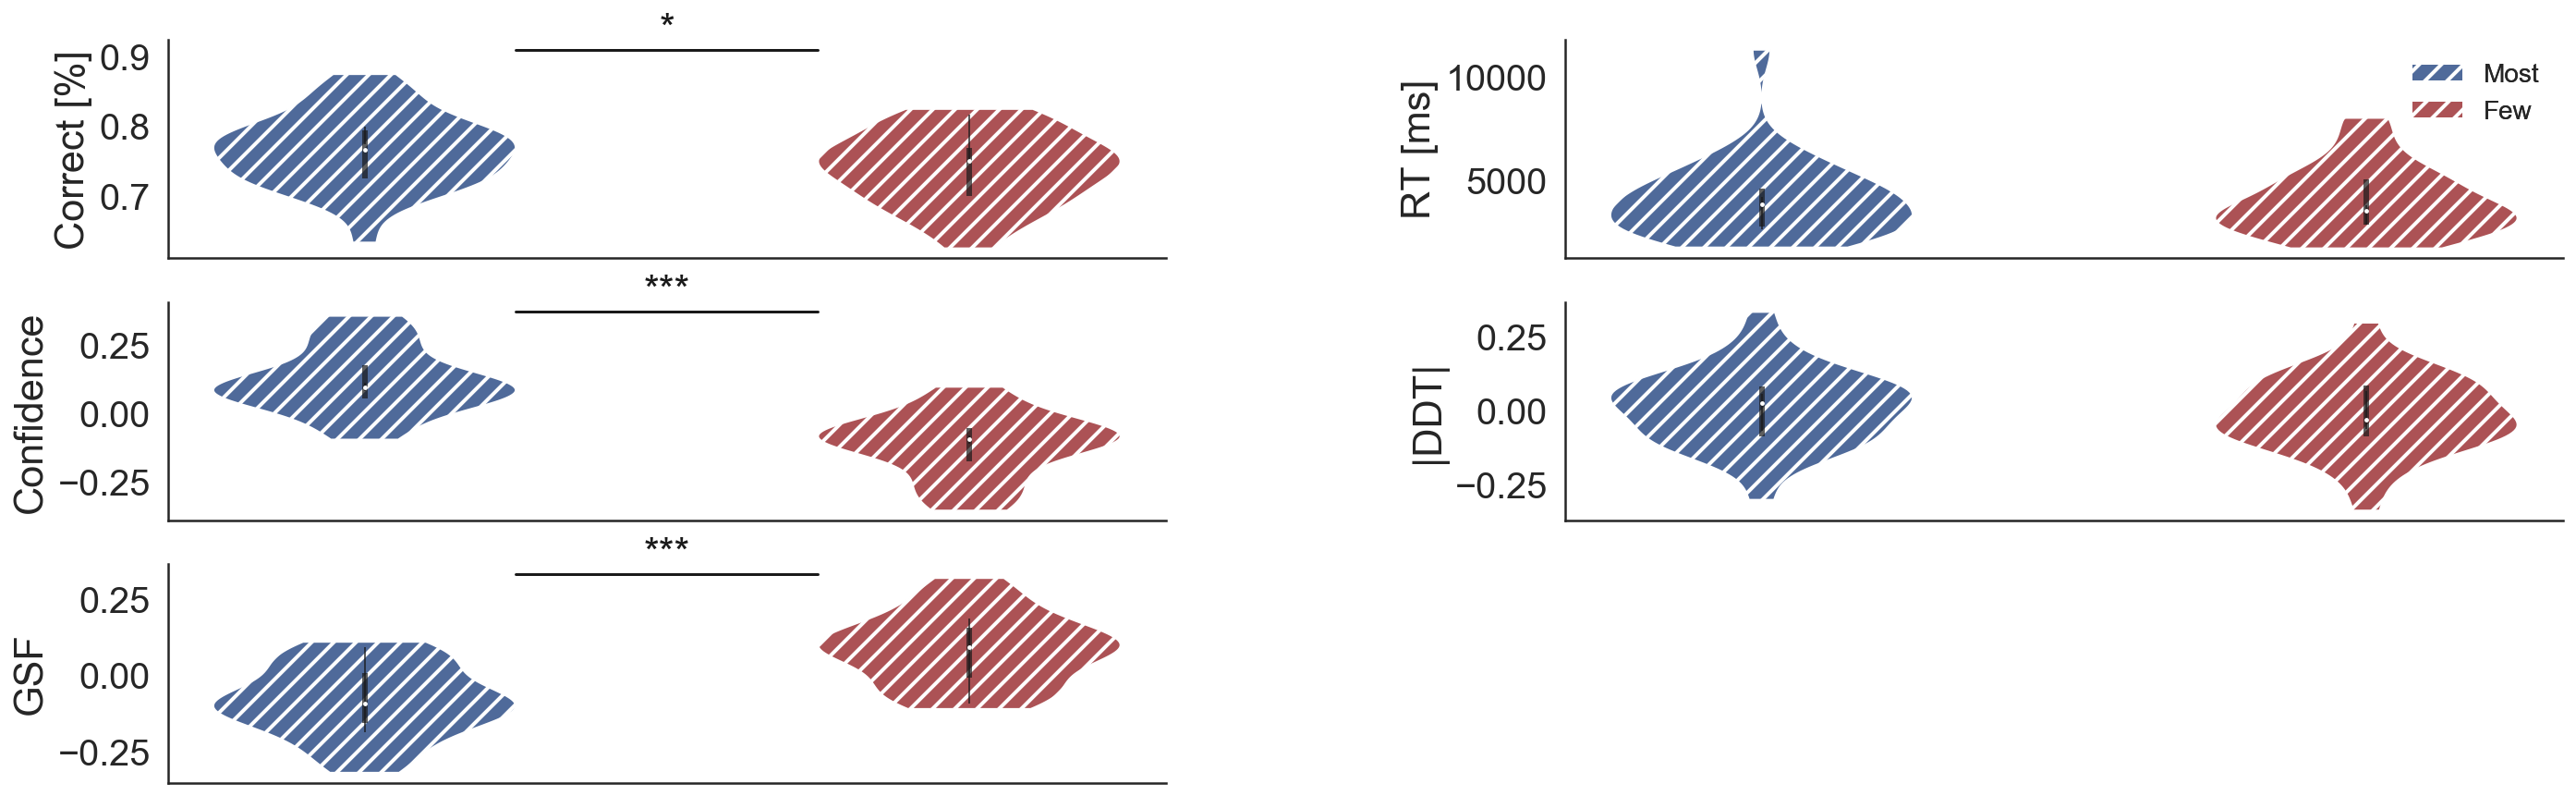

In [48]:
f = plt.figure(figsize=(20,10))
sns.set(style='white', font_scale=1.8)
#plt.suptitle('Like and dislike conditions')

#my_pal = {'#AC5255','#4F6A9A'}
#my_pal = {'#4F6A9A','#4F6A9A','#AC5255'}
my_pal = {0 :"b", 1 : "r"}
colr_dict = { 0:'#4F6A9A', 1:'#AC5255' }

wspace1 = 0.4
left1 = 0.3 
# FOR CORRECT

plt.subplot(421)

all_arr = [Correct_like,
          Correct_dislike]

# set up color and hatching on the violins
add_violin(all_arr)
#add_box_to_violin(plt,all_arr)
plt.xticks([1, 2], ['Most', 'Few'])
plt.tick_params( axis='x', which='both',bottom=False,top=False,labelbottom=False) 
plt.ylabel('Correct [%]')
plt.subplots_adjust(left=0, wspace=wspace1)

add_star1(Correct_like, Correct_dislike,p_correct)

# FOR RT
plt.subplot(422)
all_arr1 = [RT_like,
          RT_dislike]
# set up color and hatching on the violins
add_violin( all_arr1)
#add_box_to_violin(plt,all_arr1)
plt.xticks([1, 2], ['Most', 'Few'])
plt.ylabel('RT [ms]')

plt.tick_params( axis='x', which='both',bottom=False,top=False,labelbottom=False) 

# PLot legend
patch1 = mpatches.Patch(facecolor=colr_dict[0],hatch=r"//", label="Most",edgecolor="white")
patch2 = mpatches.Patch(facecolor=colr_dict[1],hatch=r"//", label="Few",edgecolor="white")
mpl.rcParams['hatch.linewidth'] = 2
leg = plt.legend(handles=[patch1,patch2],fontsize=14,loc = "upper right")
leg.get_frame().set_facecolor('none')
leg.get_frame().set_linewidth(0.0)
plt.gca().add_artist(leg)

# FOR CONF
plt.subplot(423)
all_arr1 = [Conf_like,
          Conf_dislike]
add_violin( all_arr1)
#add_box_to_violin(plt,all_arr1)
plt.xticks([1,2], ['Most', 'Few'])
plt.tick_params( axis='x', which='both',bottom=False,top=False,labelbottom=False) 
plt.ylabel('Confidence')
add_star1(Conf_like, Conf_dislike,p_conf)

plt.subplots_adjust(left=0, wspace=wspace1)

# FOR DDT
plt.subplot(424)
all_arr1 = [DDT_like,
          DDT_dislike]
add_violin( all_arr1)
#add_box_to_violin(plt,all_arr1)
plt.xticks([1, 2,], ['Most', 'Few'])
plt.tick_params( axis='x', which='both',bottom=False,top=False,labelbottom=False) 
plt.ylabel('|DDT|')


# FOR GSF
plt.subplot(425)
all_arr1 = [GSF_like,
          GSF_dislike]
add_violin( all_arr1)
#add_box_to_violin(plt,all_arr1)
plt.xticks([0, 1], ['Most', 'Few'])
plt.tick_params( axis='x', which='both',bottom=False,top=False,labelbottom=False) 
plt.ylabel('GSF')

add_star1(GSF_like, GSF_dislike,p_GSF)


sns.despine()

#plt.savefig(str('SavedFigures/BehaviouralComparison_MORE_LESS_32.png'), dpi = 200 )

## Time percent looking the most valuable item

In [40]:
def SE_calc (a):
    b = np.std(a)/np.sqrt(len(a))
    return b

In [41]:
LikeHighValGaze  =  []
LikeLowValGaze  =  []
DislikeHighValGaze  =  []
DislikeLowValGaze  =  []

LikeChoGaze  =  []
LikeUnchoGaze  =  []
DislikeChoGaze  =  []
DislikeUnchoGaze  =  []

for i in data_expL.Part.unique():
    
    Lik_MeanHValGazePC = data_expL.loc[(data_expL['Part'] == i)].HValGazePC.mean()
    Dlik_MeanHValGazePC = data_expD.loc[(data_expD['Part'] == i)].HValGazePC.mean()
    
    Lik_MeanLValGazePC = data_expL.loc[(data_expL['Part'] == i)].LValGazePC.mean()
    Dlik_MeanLValGazePC = data_expD.loc[(data_expD['Part'] == i)].LValGazePC.mean()
    
    LikeHighValGaze.append(Lik_MeanHValGazePC)
    LikeLowValGaze.append(Lik_MeanLValGazePC)
    DislikeHighValGaze.append(Dlik_MeanHValGazePC)
    DislikeLowValGaze.append(Dlik_MeanLValGazePC)
    
    
    Lik_MeanChoGazePC = data_expL.loc[(data_expL['Part'] == i)].ChosenGazePC.mean()
    Dlik_MeanChoGazePC = data_expD.loc[(data_expD['Part'] == i)].ChosenGazePC.mean()
    
    Lik_MeanUnchoGazePC = data_expL.loc[(data_expL['Part'] == i)].UnchosenGazePC.mean()
    Dlik_MeanUnchoGazePC = data_expD.loc[(data_expD['Part'] == i)].UnchosenGazePC.mean()
    
    LikeChoGaze.append(Lik_MeanChoGazePC)
    LikeUnchoGaze.append(Lik_MeanUnchoGazePC)
    DislikeChoGaze.append(Dlik_MeanChoGazePC)
    DislikeUnchoGaze.append(Dlik_MeanUnchoGazePC)
    
    
error_LikeHighValGaze  = SE_calc(LikeHighValGaze)
error_LikeLowValGaze  =  SE_calc(LikeLowValGaze)
error_DislikeHighValGaze  = SE_calc(DislikeHighValGaze)
error_DislikeLowValGaze  =  SE_calc(DislikeLowValGaze)

avg_LikeHighValGaze  = np.mean(LikeHighValGaze)
avg_LikeLowValGaze  =   np.mean(LikeLowValGaze)
avg_DislikeHighValGaze  =  np.mean(DislikeHighValGaze)
avg_DislikeLowValGaze  =   np.mean(DislikeLowValGaze)

error_LikeChoGaze  = SE_calc(LikeChoGaze)
error_LikeUnchoGaze  =  SE_calc(LikeUnchoGaze)
error_DislikeChoGaze  = SE_calc(DislikeChoGaze)
error_DislikeUnchoGaze  =  SE_calc(DislikeUnchoGaze)

avg_LikeChoGaze  = np.mean(LikeChoGaze)
avg_LikeUnchoGaze  =   np.mean(LikeUnchoGaze)
avg_DislikeChoGaze  =  np.mean(DislikeChoGaze)
avg_DislikeUnchoGaze =   np.mean(DislikeUnchoGaze)

In [49]:
# t-test
diff = avg_LikeHighValGaze - avg_DislikeHighValGaze
[s1, p1] = stats.ttest_rel(LikeHighValGaze,DislikeHighValGaze)
print (" Most High Val Gaze =  "+ str(round(mean(avg_LikeHighValGaze),2))+ " ; Mean Few High Val Gaze =  "+ str(round(mean(avg_DislikeHighValGaze),2))+"; [Most - Fewest] =  " + str(round(diff,2)) +"; t =  " + str(round(s1,2)) + " ; p-value =" + str(round(p1,2) ))

diff = avg_LikeLowValGaze - avg_DislikeLowValGaze
[s2, p2] = stats.ttest_rel(LikeLowValGaze,DislikeLowValGaze)
print (" Most High Val Gaze =  "+ str(round(mean(avg_LikeLowValGaze),2))+ " ; Mean Few High Val Gaze =  "+ str(round(mean(avg_DislikeLowValGaze),2))+"; [Most - Fewest]=  " + str(round(diff,2)) +"; t =  " + str(round(s2,2)) + " ; p-value =" + str(round(p2,2) ))


diff = avg_LikeHighValGaze - avg_LikeLowValGaze
[s3, p3] = stats.ttest_rel(LikeHighValGaze,LikeLowValGaze)
print (" Most High=  "+ str(round(mean(avg_LikeHighValGaze),2))+ " ;   Low  =  "+ str(round(mean(avg_LikeLowValGaze),2))+"; [High - low] =  " + str(round(diff,2)) +"; t =  " + str(round(s3,2)) + " ; p-value =" + str(round(p3,2) ))

diff = avg_DislikeHighValGaze - avg_DislikeLowValGaze
[s4, p4] = stats.ttest_rel(DislikeHighValGaze,DislikeLowValGaze)
print (" Few High=  "+ str(round(mean(avg_DislikeHighValGaze),2))+ " ;   Low  =  "+ str(round(mean(avg_DislikeLowValGaze),2))+"; [high - low] =  " + str(round(diff,2)) +"; t =  " + str(round(s4,2)) + " ; p-value =" + str(round(p4,2) ))



 Most High Val Gaze =  0.55 ; Mean Few High Val Gaze =  0.47; [Most - Fewest] =  0.08; t =  15.32 ; p-value =0.0
 Most High Val Gaze =  0.45 ; Mean Few High Val Gaze =  0.53; [Most - Fewest]=  -0.08; t =  -15.32 ; p-value =0.0
 Most High=  0.55 ;   Low  =  0.45; [High - low] =  0.1; t =  13.85 ; p-value =0.0
 Few High=  0.47 ;   Low  =  0.53; [high - low] =  -0.07; t =  -10.88 ; p-value =0.0


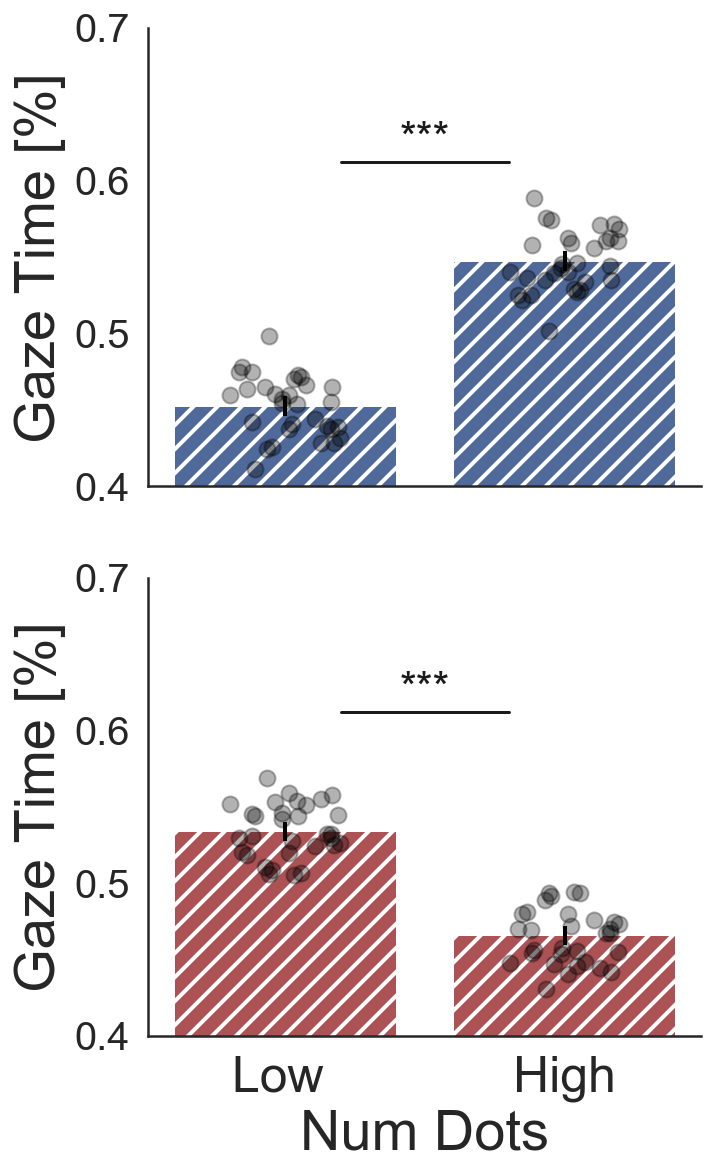

In [50]:
fig = plt.figure(figsize=[6,10])
gs = GridSpec(2,1,bottom=0.18,left=0.18,right=0.82)

ax1 = fig.add_subplot(gs[0,0])
add_star2(LikeLowValGaze,LikeHighValGaze, p3,1,2)
plt.yticks(fontsize=20)


ax2 = fig.add_subplot(gs[1,0])

# bars
ax1.bar(2, np.mean(LikeHighValGaze), width=0.8,color= '#4F6A9A',hatch=r'//')
ax1.bar(1, np.mean(LikeLowValGaze), width=0.8,color= '#4F6A9A',hatch=r'//')

ax2.bar(2, np.mean(DislikeHighValGaze), width=0.8,color='#AC5255',hatch=r'//')
ax2.bar(1, np.mean(DislikeLowValGaze), width=0.8,color='#AC5255',hatch=r'//')


# error
ax1.errorbar(2, np.mean(LikeHighValGaze), yerr=error_LikeHighValGaze*1.96, lw=2, color='#000000')
ax1.errorbar(1, np.mean(LikeLowValGaze), yerr=error_LikeLowValGaze*1.96, lw=2, color='#000000')

ax2.errorbar(2, np.mean(DislikeHighValGaze), yerr=error_DislikeHighValGaze*1.96, lw=2, color='#000000')
ax2.errorbar(1, np.mean(DislikeLowValGaze), yerr=error_DislikeLowValGaze*1.96, lw=2, color='#000000')
     
    
for i in range(1,len(LikeHighValGaze)):
        jittr = np.random.uniform(low=-0.2,high=0.2)
        ax1.plot(2+jittr, LikeHighValGaze[i], marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")
        ax1.plot(1+jittr, LikeLowValGaze[i], marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")
        ax2.plot(2+jittr, DislikeHighValGaze[i], marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")
        ax2.plot(1+jittr, DislikeLowValGaze[i], marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")

        
ax1.set_xticks([1,2])
ax1.set_xticklabels([], rotation=0, fontsize=25)
ax1.set_ylabel('Gaze Time [%]', fontsize=28)
#ax1.set_xticklabels([], rotation=0, fontsize=25)
        
ax2.set_xticks([1,2])
ax2.set_xticklabels(["Low ","High"], rotation=0, fontsize=25)
ax2.set_ylabel('Gaze Time [%]', fontsize=28)
ax2.set_xlabel('Num Dots', fontsize=28)

ax1.set_ylim([0.4,0.70])
ax2.set_ylim([0.4,0.70])

plt.yticks(fontsize=20)


sns.despine()

#patch1 = mpatches.Patch(facecolor='#4F6A9A',hatch=r'//', label='Most')
#patch2 = mpatches.Patch(facecolor='#AC5255',hatch=r'//', label='Few')
#leg = plt.legend(handles=[patch1,patch2],fontsize=18,loc = "upper right",frameon = False)

add_star2(LikeLowValGaze,LikeHighValGaze, p4,1,2)


#fig.savefig(str('SavedFigures/BehavGazeMoreLess_32.png'), dpi = 200 )

# Appendix
_____________________________________________________________________________________________________________________

<a id='ImpPkg'></a>
# 1. Import Packages

In [44]:
import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame as DF

import seaborn as sns
sns.set(color_codes=True)
#np.random.seed(sum(map(ord, "distributions")))
from sklearn import linear_model  # packages for the logistic regression function to plot the logistic regression 
from sklearn.linear_model import LogisticRegression # packages for the logistic regression function to plot the logistic regression 
import scipy
from scipy import stats, integrate
from scipy.stats import mode
from scipy.stats.stats import pearsonr # Pearson's correlation
from copy import copy as copy
import operator as operator
import pylab

# Plotting tools
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%pylab inline
figsize(5, 5)

import glob

import os
# Added to avoid OMP:error#15
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Populating the interactive namespace from numpy and matplotlib


In [45]:
import rpy2

%load_ext rpy2.ipython
# Set up interface with R
# Make it easy to set and find values in a multi-index DF
idx = pd.IndexSlice
# Set up interface with R
%config InlineBackend.figure_format = 'retina'
import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore", category=RRuntimeWarning)
warnings.filterwarnings('ignore')

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [3]:
%%R
# Use in case the libraries are not available in the system
#install.packages('lme4')
#install.packages("car")
#install.packages("ggplot2")
#install.packages("broom")
#install.packages("arm")
#install.packages("ggplot2")
#install.packages("optimx")
#install.packages("multcomp")

NULL


<a id='LoadFunc'></a>
# 2. Defining Functions

#### Taken from Folke et al. (2016)

### Plot distributions

In [4]:
def participant_densities(data, var, xlim=(0,100), rug=True):
    # a counter that tells us where a given participant's data should be plotted
    order = 1

    # a list of all the participants in the dataset
    participants = data.loc[:, 'Part'].unique()

    # defining the figure size
    sns.set_style('white')
    fig = figure(figsize=(15,70))

    for x in participants:
        # defining the sub figures
            sub={}
            sub['%s' % x] = plt.subplot(len(participants)/2, 3, order)
            sns.kdeplot(data.loc[data['Part'] == x, var].values, ax = sub['%s' % x], shade=True)
            #if rug==True:
            #    sns.rugplot(data.loc[data['Part'] == x, var].values, ax = sub['%s' % x])
            sub['%s' % x].set_title('participant %s' % x)
            #sub['%s' % x].set_xlim(xlim)
            order += 1

### Split variable into participantwise quantiles

In [5]:
def parsplit(DF, input, quantiles):
    qvalues = pd.qcut(DF[input], quantiles, labels = range(1, quantiles+1))
    return qvalues

### Full simple logistic graph

In [6]:
def logisticplot_all (moderator, modhigh, modlow, data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(6,5))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()


    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    # Paula used these dictionaries to store the values of the predictive lines for all the participants.
    logit_low = {}
    logit_high = {}

    # I think this defines the problem space
    X_test = np.linspace(-5,10,300)

    # fitting the predictive logistic model for the low_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==0)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==0)].index, yaxis])
    logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()

    print ('Low measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)


    # fitting the predictive logistic model for the high_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==1)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==1)].index, yaxis])
    logit_high = model(X_test * clf.coef_ + clf.intercept_).ravel()
    
    print ('high measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)

    
    
    #Plotting the predictive lines
    line_high = sub.plot(X_test, logit_high,'r--', color=modhighcol, linewidth=5, label=modhigh, zorder=6)
    line_low = sub.plot(X_test, logit_low,'r--', color=modlowcol, linewidth=5, label=modlow, zorder=5)


    #Plotting the binned data
    data['DVBin2'] = data.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values
    
    # determine the x coordinates
    x_cords= data.groupby('DVBin2')[xaxis].mean()
    
    # determine low y coordinates
    y_cords_low = data.loc[(data[moderator]==0), :].groupby('DVBin2')[yaxis].mean().values
    
    # determine low y standard errors
    test = pd.DataFrame(data.loc[(data[moderator]==0), :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    
    # determine high y coordinates
    y_cords_high = data.loc[(data[moderator]==1), :].groupby('DVBin2')[yaxis].mean().values
    
    # determine high y standard errors
    test2 = pd.DataFrame(data.loc[data[moderator]==1, :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    # plot the low points
    plt.scatter(x_cords, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
    # plot low error bars
    plt.errorbar(x_cords, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)
    
    # plot the high points
    plt.scatter(x_cords, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2)
    # plot high error bars
    plt.errorbar(x_cords, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)
    
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=28)
    sub.set_xlabel(xlab, fontsize=28)

    # Set Ticks
    sub.set_xticks((-5,-3,-1,1,3,5))
    sub.set_yticks((0,0.25,0.5,0.75,1))
    sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
    sub.set_ylim(-0.01, 1.01)
    sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    leg = sub.legend(loc=0, prop={'size':20})
    leg.get_frame().set_linewidth(0.0)

    sns.despine()
    
    return plt

### Full simple logistic graph (no bins)

In [7]:
def logisticplot_simpl (moderator, modhigh, modlow, data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(8,7))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()


    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    # Paula used these dictionaries to store the values of the predictive lines for all the participants.
    logit_low = {}
    logit_high = {}

    # I think this defines the problem space
    X_test = np.linspace(-5,10,300)

    # fitting the predictive logistic model for the low_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==0)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==0)].index, yaxis])
    logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()
    print ('Low measure coef',clf.coef_)
    
    # fitting the predictive logistic model for the high_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==1)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==1)].index, yaxis])
    logit_high = model(X_test * clf.coef_ + clf.intercept_).ravel()
    print ('High measure coef',clf.coef_)



    #Plotting the predictive lines
    line_high = sub.plot(X_test, logit_high, color=modhighcol, linewidth=5, label=modhigh, zorder=6)
    line_low = sub.plot(X_test, logit_low, color=modlowcol, linewidth=5, label=modlow, zorder=5) 
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=30)
    sub.set_xlabel(xlab, fontsize=30)

    # Set Ticks
    sub.set_xticks((-5,-3,-1,1,3,5))
    sub.set_yticks((0,0.25,0.5,0.75,1))
    sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
    sub.set_ylim(-0.01, 1.01)
    sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    sub.legend(loc=0, prop={'size':20})
    leg.get_frame().set_linewidth(0.0)

    sns.despine()

### Regression Coefficients Plot

In [8]:
def Coefpresplot(regtable, intercept=False, title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)

    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=20)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    
    # Set axis limits based on whether to include the intercept or not    
    if intercept == True:
        XLim = (0.75, len(regtable.columns) + 0.25)
        YLim = (round_to_5(regtable.loc['CImin', :].min()-0.1), round_to_5(regtable.loc['CImax', :].max()+0.2))
    else:
        XLim = (0.75, len(regtable.columns) - 0.75)
        YLim = (round_to_5(regtable.loc['CImin', regtable.columns[1]:].min()-0.2), round_to_5(regtable.loc['CImax', regtable.columns[1]:].max()+0.2))
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    if intercept == True:
        Coefficients = regtable.columns
    else:
        Coefficients = regtable.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    colourlist = ['#000000'] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        ax.plot(position, regtable.loc['coefficient', Coefficient], marker='o', ms=8, color=colourlist[position-1],)
        ax.errorbar(position, regtable.loc['coefficient', Coefficient],
                    yerr=regtable.loc['se', Coefficient]*1.96, lw=2, color=colourlist[position-1])

    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))


    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable.columns, rotation=40)
    else: 
        ax.set_xticklabels(regtable.columns[1:], rotation=40)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Fixed Effects Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()
    
    sns.despine()

In [9]:
def Coefpresplot2(regtable,regtable2, intercept=False, title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)

    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=20)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    

    # Set axis limits based on whether to include the intercept or not    
    
       
    
    if intercept == True:
        
        XLim = (0.75, len(regtable.columns) + 0.25)
        
        #Determine the Ymax and Ymin for both regresions results
        if round_to_5(regtable.loc['CImin', :].min()) < round_to_5(regtable2.loc['CImin', :].min()):
            Ymin = round_to_5(regtable.loc['CImin', :].min()-0.5)
        else :
            Ymin = round_to_5(regtable2.loc['CImin',:].min()-0.5)
        if round_to_5(regtable.loc['CImax', :].max()) > round_to_5(regtable2.loc['CImax', :].max()):
            Ymax = round_to_5(regtable.loc['CImax', :].max()+0.5)
        else :
            Ymax = round_to_5(regtable2.loc['CImax', :].max()+0.5)      

        YLim = (Ymin, Ymax)    
    else:
        XLim = (0.75, len(regtable.columns) - 0.75)
        
        #Determine the Ymax and Ymin for both regresions results
        if round_to_5(regtable.loc['CImin', regtable.columns[1]:].min()) < round_to_5(regtable2.loc['CImin', regtable.columns[1]:].min()):
            Ymin = round_to_5(regtable.loc['CImin', regtable.columns[1]:].min()-0.5)
        else :
            Ymin = round_to_5(regtable2.loc['CImin',regtable.columns[1]:].min()-0.5)
        if round_to_5(regtable.loc['CImax', regtable.columns[1]:].max()) > round_to_5(regtable2.loc['CImax', regtable.columns[1]:].max()):
            Ymax = round_to_5(regtable.loc['CImax', regtable.columns[1]:].max()+0.5)
        else :
            Ymax = round_to_5(regtable2.loc['CImax', regtable.columns[1]:].max()+0.5)      
        
        YLim = (Ymin, Ymax)
    
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    # both regtable should have the same regressors (and in the same order)

    if intercept == True:
        Coefficients = regtable.columns
 #       Coefficients2 = regtable2.columns
    else:
        Coefficients = regtable.columns[1:]
#        Coefficients2 = regtable2.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    colourlist = ['#000000'] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        ax.plot(position-0.1, regtable.loc['coefficient', Coefficient], marker='o', ms=8, color='blue',label = 'Like')
        ax.plot(position+0.1, regtable2.loc['coefficient', Coefficient], marker='X', ms=8, color='red', label = 'Dislike')


        ax.errorbar(position-0.1, regtable.loc['coefficient', Coefficient],
                    yerr=regtable.loc['se', Coefficient]*1.96, lw=2, color='blue')
        ax.errorbar(position+0.1, regtable2.loc['coefficient', Coefficient],
                    yerr=regtable2.loc['se', Coefficient]*1.96, lw=2, color='red')
        
        if position == 1:
            ax.legend( prop={'size': 20})

 
    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))

    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable.columns, rotation=40)
    else: 
        ax.set_xticklabels(regtable.columns[1:], rotation=40)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Fixed Effects Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()

    sns.despine()
    fig.savefig(str('SavedFigures/'+title +'.png'), dpi = 200 )

In [10]:
def Coefpresplot_bar(regtable, mixtable, intercept=False, barcol='#000000', title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0 ):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)
            
    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=20)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    
    # Set axis limits based on whether to include the intercept or not    
    if intercept == True:
        XLim = (0, len(regtable.columns) + 1)
        YLim = (round_to_5(np.min(mixtable)-0.2), round_to_5(np.max(mixtable)+0.2))
    else:
        XLim = (0, len(regtable.columns) )
        YLim = (round_to_5(np.min(mixtable)-0.2), round_to_5(np.max(mixtable)+0.2))
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    if intercept == True:
        Coefficients = regtable.columns
    else:
        Coefficients = regtable.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    colourlist = [barcol] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        ax.bar(position, regtable.loc['coefficient', Coefficient], width=0.8,color=colourlist[position-1],)
        ax.errorbar(position, regtable.loc['coefficient', Coefficient],
                    yerr=regtable.loc['se', Coefficient]*1.96, lw=2, color='#000000')
        
   # Plot dots for the individual coefficients
    coef_num = len(mixtable)
    for i in range(1,coef_num):
        part_coefs = mixtable[i]
        position_parts= np.full(len(part_coefs), i, dtype=int)
        jittr = np.random.uniform(low=-0.5,high=0.5,size=len(part_coefs))/2
        ax.plot(position_parts+jittr, part_coefs, marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")

        

    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))


    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable.columns, rotation=40)
    else: 
        ax.set_xticklabels(regtable.columns[1:], rotation=40)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Regression Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()
    
    sns.despine()

In [11]:
def Coefpresplot_bar2(regtable1, mixtable1,regtable2, mixtable2, intercept=False, barcol1='#000000',barcol2='#000000', title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0 ):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)
            
    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=20)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    
    # Set axis limits based on whether to include the intercept or not   
    # Assumuing that regtable1 and regtable2 have exactly the same number of coefficients
    if intercept == True:
        XLim = (0, len(regtable1.columns) + 2)
        YLim = (round_to_5(np.min([mixtable1,mixtable2]))-0.2, round_to_5(np.max([mixtable1,mixtable2]))+0.2)
    else:
        XLim = (0, len(regtable1.columns) +1)
        YLim = (round_to_5(np.min([mixtable1,mixtable2]))-0.2, round_to_5(np.max([mixtable1,mixtable2]))+0.2)
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    # Assumuing that regtable1 and regtable2 have exactly the same number of coefficients

    if intercept == True:
        Coefficients = regtable1.columns
    else:
        if len(regtable1.columns)<len(mixtable1):
            Coefficients = regtable1.columns
        else:
            Coefficients = regtable1.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    # Color for conditions 1 and 2
    colourlist1 = [barcol1] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    colourlist2 = [barcol2] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        # Plot condition 1
        ax.bar(position-0.2, regtable1.loc['coefficient', Coefficient], width=0.4,color=colourlist1[position-1],)
        ax.errorbar(position-0.2, regtable1.loc['coefficient', Coefficient],
                    yerr=regtable1.loc['se', Coefficient]*1.96, lw=2, color='#000000')

        # Plot condition 2
        ax.bar(position+0.2, regtable2.loc['coefficient', Coefficient], width=0.4,color=colourlist2[position-1],)
        ax.errorbar(position+0.2, regtable2.loc['coefficient', Coefficient],
                    yerr=regtable2.loc['se', Coefficient]*1.96, lw=2, color='#000000')

        
   # Plot dots for the individual coefficients
    # Assumuing that mixtable1 and mixtable2 have exactly the same number of elements 
    
    if intercept == True:
        coef_num = range(0,len(mixtable1)) 
    else:
        coef_num = range(1,len(mixtable1))
        
    for i in coef_num:
        # Plot dots condition 1
        part_coefs = mixtable1[i]
        position_parts= np.full(len(part_coefs), i, dtype=int)
        jittr = np.random.uniform(low=-0.2,high=0.2,size=len(part_coefs))/2
        ax.plot(position_parts-0.2+jittr, part_coefs, marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")

        # Plot dots condition 1
        part_coefs = mixtable2[i]
        position_parts= np.full(len(part_coefs), i, dtype=int)
        jittr = np.random.uniform(low=-0.2,high=0.2,size=len(part_coefs))/2
        ax.plot(position_parts+0.2+jittr, part_coefs, marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")
        

    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))


    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable1.columns, rotation=0)        
    else:
        if len(regtable1.columns)<len(mixtable1):
            ax.set_xticklabels(regtable1.columns, rotation=0)
        else:    
            ax.set_xticklabels(regtable1.columns[1:], rotation=0)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Regression Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()
    
    sns.despine()

In [12]:
def regtable(fix, fix_se, names):
    fixed_betas = DF(np.array(fix)); fixed_betas = fixed_betas.transpose(); fixed_betas.columns = names
    fixed_betas.loc[1] = np.array(fix_se)
    fixed_betas.loc[2] = fixed_betas.loc[0] - (fixed_betas.loc[1]*1.96)
    fixed_betas.loc[3] = fixed_betas.loc[0] + (fixed_betas.loc[1]*1.96)
    fixed_betas.index = ['coefficient', 'se', 'CImin', 'CImax']
    return fixed_betas

In [13]:
def correl_plot2 (data_all,data_all2,x_variable,y_variable,color1 = '#000000',color2 = '#000000',x_varlabel = "x_variable" ,y_varlabel = "y_variable", data_label =('Correct', 'Error'), title = "Pretty PLot"):

    f = plt.figure(figsize=(5, 8))
    sns.set(style='white', font_scale=1.8)
    ax = sns.regplot(data=data_all, x= x_variable, y=y_variable, fit_reg=False, ci=0, color= color1, scatter_kws={'s':70,'alpha':0.3},)
    ax = sns.regplot(data=data_all2, x= x_variable, y=y_variable, fit_reg=False, ci=0, color= color2, scatter_kws={'s':70,'alpha':0.3})
    ax.set(ylabel=y_varlabel, xlabel=x_varlabel)

    # For data 1
    x=data_all[x_variable]
    y=data_all[y_variable]
    fit = np.polyfit(x, y, deg=1)
    future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
    fit_fn = np.poly1d(fit)
    future_fit = np.polyval(fit_fn, future)
    p1 = ax.plot(future, future_fit, color=color1, lw=3, label = data_label[0])
    
    results = pearsonr(data_all[x_variable], data_all[y_variable])
    print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))
    
    # For data 2
    x=data_all2[x_variable]
    y=data_all2[y_variable]
    fit = np.polyfit(x, y, deg=1)
    future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
    fit_fn = np.poly1d(fit)
    future_fit = np.polyval(fit_fn, future)
    p2 = ax.plot(future, future_fit, color=color2, lw=3,label = data_label[1] )
    sns.despine()
    #ax.set_title(title)    
    results = pearsonr(data_all2[x_variable], data_all2[y_variable])
    print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))
    
    ax.legend()
    ax.set_title(title)

    #plt.legend((p1, p2), data_label )
    
    plt.show()

In [14]:
def logisticplot_all_sbj_slope(moderator, modhigh, modlow, data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
#inputs example   
#logisticplot_all('DDTSplit', 'High DDT', 'Low DDT', data=data_expL, xaxis='zDVal', yaxis='Choice', ylab='P(Right Item)', xlab='Difference in Value (DVal)',
#                 modhighcol='#4F6A9A', modlowcol='#B5C8E9', title='empty', parvar='Part')


    # Counter to know where to plot the particpant
    order = 1
    # Initialize the array to store coefs
    coefs_all = []

   # a list of all the participants in the dataset
    participants = data.loc[:, 'Part'].unique()

    # defining the figure size
    sns.set_style('white')
    fig = figure(figsize=(50,70))

    for x in participants:
        # defining the sub figures
            sub={}
            sub['%s' % x] = plt.subplot(int(len(participants)/5+1), 5, order)
            
            
            # Extract dataframe for that particualt participant
            data_in = data.loc[data['Part'] == x]
           
            sns.set(font_scale=1.5, style='white')
           
            # defining the sigmoid function
            def model(x):
                y = 1 / (1 + np.exp(-x))
                return y

            #sub = plt.subplot()
            sub['%s' % x].set_title('Part. %s' % x, fontsize = 50 )


            #run the classifier
            clf = linear_model.LogisticRegression(C=1e5)

            # Paula used these dictionaries to store the values of the predictive lines for all the participants.
            logit_low = {}
            logit_high = {}
            logit_all = {}

            
            # I think this defines the problem space
            X_test = np.linspace(-5,10,300)

            # fitting the predictive logistic model for the low_confidence trials, for a participant specified by x
            # first I specify the value difference right - left, then I specify the choices, left or right
            clf.fit(data_in.loc[data_in[(data[moderator]==0)].index, xaxis][:, np.newaxis],
                    data_in.loc[data_in[(data[moderator]==0)].index, yaxis])
            logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()

            #print ('Part: ',x , ' Low measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)

            low_coef = clf.coef_
            low_intercept = clf.intercept_
            
            # fitting the predictive logistic model for the high_confidence trials, for a participant specified by x
            # first I specify the value difference right - left, then I specify the choices, left or right
            clf.fit(data_in.loc[data_in[(data_in[moderator]==1)].index, xaxis][:, np.newaxis],
                    data_in.loc[data_in[(data_in[moderator]==1)].index, yaxis])
            logit_high = model(X_test * clf.coef_ + clf.intercept_).ravel()

            #print ('Part: ',x ,' High measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)
            
            high_coef = clf.coef_
            high_intercept = clf.intercept_
            
            
            # fitting the predictive logistic model for all the trials, for a participant specified by x
            # first I specify the value difference right - left, then I specify the choices, left or right
            clf.fit(data_in[xaxis][:, np.newaxis],
                    data_in[yaxis])
            logit_all = model(X_test * clf.coef_ + clf.intercept_).ravel()

            #print ('Part: ',x ,' High measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)
            
            all_coef = clf.coef_
            all_intercept = clf.intercept_
    
            #Plotting the predictive lines
            line_high = sub['%s' % x].plot(X_test, logit_high, color=modhighcol, linewidth=5, label=modhigh, zorder=6,linestyle='--')
            line_low = sub['%s' % x].plot(X_test, logit_low, color=modlowcol, linewidth=5, label=modlow, zorder=5,linestyle='--')
            line_all = sub['%s' % x].plot(X_test, logit_all, color="#000000", linewidth=3, label=modlow, zorder=5,linestyle='--')
            
            coefs_part= np.column_stack((x,low_coef,low_intercept,high_coef,high_intercept,all_coef,all_intercept))
            coefs_all.append(coefs_part[0])

            
            #Plotting the binned data
            data_in['DVBin2'] = data_in.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values[0]

            # determine the x coordinates
            x_cords= data.groupby('DVBin2')[xaxis].mean()

            # determine low y coordinates
            y_cords_low = data_in.loc[(data_in[moderator]==0), :].groupby('DVBin2')[yaxis].mean().values

            # determine low y standard errors
            test = pd.DataFrame(data_in.loc[(data_in[moderator]==0), :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
            y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))

    
            # determine high y coordinates
            y_cords_high = data_in.loc[(data_in[moderator]==1), :].groupby('DVBin2')[yaxis].mean().values

            # determine high y standard errors
            test2 = pd.DataFrame(data_in.loc[data_in[moderator]==1, :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
            y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))

            # plot the low points
            plt.scatter(x_cords, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
            # plot low error bars
            plt.errorbar(x_cords, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)

            # plot the high points
            plt.scatter(x_cords, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2)
            # plot high error bars
            plt.errorbar(x_cords, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)

    
            # Set Labels
           # sub['%s' % x].set_ylabel(ylab, fontsize=30)
           # sub['%s' % x].set_xlabel(xlab, fontsize=30)

            # Set Ticks
            sub['%s' % x].set_xticks((-5,-3,-1,1,3,5))
            sub['%s' % x].set_yticks((0,0.25,0.5,0.75,1))
            sub['%s' % x].tick_params(axis='both', which='major', labelsize=30)

            # Set Limits
            sub['%s' % x].set_ylim(-0.01, 1.01)
            sub['%s' % x].set_xlim(-5, 5)
        

            sns.despine()
            
            order += 1
    
    custom_lines = [Line2D([0], [0], color=modhighcol, lw=4),
                Line2D([0], [0], color=modlowcol, lw=4)]
    fig.legend(custom_lines, [modhigh, modlow],loc = 4,fontsize=50)       

    fig.text(0.5, -0.01, xlab, ha='center',fontsize = 70)
    fig.text(-0.01, 0.5, ylab, va='center', rotation='vertical',fontsize = 70)
    
    coefs_all = pd.DataFrame(coefs_all,columns=['Participant','Low Coef','Low Intercept','High Coef','High Intercept','All Coef','All Intercept'])
    return coefs_all

In [15]:
def z_score1(data_all, part_def,z_score_var):
    z_matrix=[]
    z_matrix_aux=[]

    for i in (data_all[part_def].unique()):
        Choicedata = data_all.loc[data_all[part_def] == i]    
    
        pX_A= pd.to_numeric(Choicedata[z_score_var]) 
        pX_zA= (pX_A - np.mean(pX_A))/np.std(pX_A)

        z_matrix_aux= pX_zA.values
    
        for  j in range(len(z_matrix_aux)):    
            z_matrix.append(z_matrix_aux[j])
    return z_matrix

In [16]:
def splitBy(data_exp1, Splits_headers = ['ConfSplit', 'GSFMedSplit','DDTMedSplit'],Splits_variables = ['Conf', 'tGSF','tDDT']):
    
    median_matrix=[]
    median_matrix_aux=[]
    median_matrix_aux_cond=[]
    Split_cols = []
    
    for h in range(len(Splits_variables)):
        median_matrix=[]
        for i in unique(data_exp1["Part"]):
            median_matrix_aux=[]
    
            for j in unique(data_exp1["BlockCond"]):
                #median_matrix_aux_cond=[]
    
                #Extract data by participant and BlockCond (1: Like, 2: Dislike)
                Splitdata = data_exp1.loc[data_exp1['Part'] == i]
                Splitdata = Splitdata.loc[Splitdata['BlockCond'] == j]
                
                # Select the column to split
                Splitdata = Splitdata.loc[:,['TrialN',Splits_variables[h]]]
                SplitSort = Splitdata.values
                # Sort for confidence column
                SplitSort = SplitSort[np.argsort(SplitSort[:, 1])]
                #print(SplitSort)
                lenPart = len(Splitdata)
                #print(lenPart)
                # Generate column with median order
                median_low = [0] * int (lenPart/2)
    
                if len(SplitSort) != 2*len(median_low):
                    median_high=  [1] * int(len(SplitSort)-len(median_low))
                else: median_high = [1] * int (lenPart/2)
            
                median_split_order = median_low + median_high
                #Attach split median order column (1 and 0)
                median_aux= np.column_stack((SplitSort,median_split_order))
                #Sort back to trial number
                SplitSorted = median_aux[np.argsort(median_aux[:, 0])]
                #print(len(SplitSorted))
                
                for kk in range(len(SplitSorted)): 
                    if len(median_matrix_aux) == 0 :
                        median_matrix_aux = SplitSorted[0]
                    else:
                        median_matrix_aux = np.vstack([median_matrix_aux, SplitSorted[kk]])
            
            
            #print(["participant "+ str(i)+ " done"])
            # sort after adding both conditions    
            median_matrix_aux = median_matrix_aux[np.argsort(median_matrix_aux[:, 0])]
            
            #Extract only the column with the median split information
            median_matrix_aux = median_matrix_aux[:,2]
            
            #append to median matrix for the participants
            for k in range(len(median_matrix_aux)):    
                median_matrix.append(median_matrix_aux [k])
        
        median_matrix = pd.DataFrame(median_matrix,columns=[Splits_headers[h]])
        #print(len (median_matrix))
        #add new column (new split variable columns) to the split matrix
        if  h == 0:
            Split_cols = median_matrix
        else:
            Split_cols = pd.concat([Split_cols,median_matrix ],axis =1)   
    
    return Split_cols

In [17]:
# Add asterisk
def add_star(RT_like, RT_dislike):
    x1, x2 = 0, 1   
    y_max = max([np.max(RT_like), np.max(RT_dislike)])
    y, h, col = y_max + y_max/50, y_max/50, 'k'
    plt.plot( [x1+0.25, x2-0.25], [ y+h, y+h], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)
    
    
# Add asterisk
def add_star1(RT_like, RT_dislike, p):
    
    if p<0.001:
        star_text = '***'
    elif p<0.01:
        star_text = '**'
    elif p<0.05:
        star_text = '*'
        
    x1, x2 = 1, 2   
    y_max = max([np.max(RT_like), np.max(RT_dislike)])
    y, h, col = y_max + y_max/50, y_max/50, 'k'
    plt.plot( [x1+0.25, x2-0.25], [ y+h, y+h], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, star_text, ha='center', va='bottom', color=col)

In [18]:
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value



def add_violin(all_arr):
    parts = plt.violinplot( all_arr, showmeans=False, showextrema=False, showmedians=False)
    for i, face in enumerate(parts['bodies']):
        face.set_hatch('//')
        face.set_facecolor(colr_dict[i])
        face.set_edgecolor('white')
        face.set_alpha(1)
  #  parts2 = plt.violinplot( all_arr
   #                         , showmeans=False, showextrema=False, showmedians=False)
  #  for i, face in enumerate(parts2['bodies']):
       # face.set_hatch('//')
       # face.set_facecolor('None')
   #     face.set_alpha(1)

    quartile1, medians, quartile3 = np.percentile(all_arr, [25, 50, 75], axis=1)
    whiskers = np.array([
        adjacent_values(sorted_array, q1, q3) 
        for sorted_array, q1, q3 in zip(all_arr, quartile1, quartile3)])
    whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]

    inds = np.arange(1, len(medians)+1)
    plt.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=3,alpha = 0.7)
    plt.vlines(inds, whiskersMin, whiskersMax, color='k', linestyle='-', lw=1,alpha = 0.7)
    plt.scatter(inds, medians, marker='o', color='white', s=2, zorder=2,alpha = 1)    

In [19]:
def ttestsPlot(data1, data2,c1 ='#4F6A9A',c2 = '#AC5255',lab1 = "Like", lab2 = "Dislike",title = ''):

    # t-TEST
    diff = mean(data1) - mean(data2)
    [s, p] = stats.ttest_rel(data1,data2)
    print ("ChoiceSlopes: MeanL = "+ str(mean(data1))+ "; MeanD = "+ str(mean(data2))+"; [Like - Dislike] =  " + str(diff) +"; t =  " + str(round(s,2)) + " ; p-value =" + str(p) )
    
        
    # PLOT LIKE AND DISLIKE VARIABILITY
        
    # Set seaborn style for the plot
    fig = plt.figure(figsize=[6,10])
    sns.set(style='white',font_scale=1.5)
    jittr = np.random.uniform(low=-0.3,high=0.3,size=len(data1))    
    plt.scatter([1]*len(data1)+jittr, data1, c= c1, alpha=0.7,label=lab1)
    plt.scatter([2]*len(data2)+jittr, data2, c= c2, alpha=0.7,label=lab2)
    
    ## add lines between slope points in like and dislike for each participant
    
    for i in range(len(data1)):
        plt.plot( [1 + jittr[i],2 + jittr[i]], [ data1[i] , data2[i]],'--', lw=1.0, color = 'black', alpha = 0.2)
        if data1[i]<data2[i]:
            print ("Participants with slope in Like < Dislike: " + str(i))
            
    
    #legend(loc = 'best')
    plt.xticks([1, 2,], [lab1, lab2],fontsize=25)
    plt.yticks(fontsize=20)

    plt.ylabel(title, fontsize=28)
    sns.despine()

In [20]:
# Add asterisk
def add_star2(RT_like, RT_dislike, p,x1,x2):
    
    if p<0.001:
        star_text = '***'
    elif p<0.01:
        star_text = '**'
    elif p<0.05:
        star_text = '*'
    y_max = max([np.max(RT_like), np.max(RT_dislike)])
    y, h, col = y_max + y_max/50, y_max/50, 'k'
    plt.plot( [x1+0.8, x2-0.8], [ y+h, y+h], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, star_text, ha='center', va='bottom', color=col)